#### Import Statements

In [1]:
# Data structures
import numpy as np 
import pandas as pds

# Plotting
from matplotlib import pyplot as plt

# Web-scraping
import requests 
from io import StringIO 

#### Background Information

There are a few things to consider before fetching the data, which comes from [this location](http://skyserver.sdss.org/dr14/en/home.aspx).  We are primarily focusing on the `photoObj` properties, though certainly you could [look elsewhere](http://skyserver.sdss.org/dr7/en/help/docs/tabledesc.asp).

First, this is all stored in a database object.  As such, it is necessary to query the data using the necessary keywords.  That is provided below.  

Second, it is a large dataset.  As such, it would be better to instead fetch a portion of the entire set, as opposed to everything.  We do this by the right ascension (an angle in radians) and the declination (an angle in radians, also).  By limiting it such that

$x_{lower} < x < x_{upper}$

where $x$ can either be right ascension or declination, we can instead retrieve a patch of the sky.  However, one thing to note here is that a negative angle would also correspond to $2\pi + x$.  Choose your bounds carefully.  

#### Fetching the Data

In [30]:
def fetch_patch(ra, dec): 
    
    # Note:
    # ra -> right ascension
    # dec -> declination
    
    ra_lower, ra_upper = ra
    dec_lower, dec_upper = dec
    
    # ra_lower -> lower right ascension bound
    # ra_upper -> upper right ascension bound
    # dec_lower -> lower declination bound
    # dec_upper -> upper declination bound
    
    # query -> the string being sent to the SkyServer database
    # You can find what all these variables mean on the site, 
    # You can also include more variables if desired.
    
    query = '''SELECT
       p.objid, p.ra, p.dec, p.u, p.g, p.r, p.i, p.z,
       s.specobjid, s.class, s.z as redshift
    FROM PhotoObj AS p
       JOIN SpecObj AS s ON s.bestobjid = p.objid
    WHERE 
       p.ra between {} and {} and
       p.dec between {} and {}
    '''.format(ra_lower, ra_upper, dec_lower, dec_upper)
    
    # The location of the site.
    url = 'http://skyserver.sdss.org/dr14/SkyServerWS/SearchTools/SqlSearch?cmd={}&format=csv'.format(query)
    
    # Making a request on the data.
    r = requests.get(url)
    
    # Check for a succesful result.
    if r.status_code == 200:
        
        # This creates a csv file from the text.
        csv = StringIO(r.text)
        
        # Making a dataframe, since operations on that are easier.
        df = pds.read_csv(csv, skiprows = 1)
        
        return df

In [36]:
# Start with something small, say, 1 radian across both.
ra = (0, 1)
dec = (0, 1)

stars = fetch_patch(ra, dec)

In [38]:
stars.head()

,objid,ra,dec,u,g,r,i,z,specobjid,class,redshift
0,1237663277927891688,0.370152,0.489188,22.63679,22.05188,20.41780,19.46528,18.95657,4747027470481334272,GALAXY,0.483567
1,1237663277927956712,0.513044,0.607911,19.43647,18.22934,17.73360,17.45712,17.27946,435863481728657408,GALAXY,0.099217
2,1237663277928087757,0.698067,0.484426,20.25805,18.72041,17.97488,17.58860,17.31249,1677687943327672320,GALAXY,0.079543
3,1237663277928153273,0.879271,0.458226,19.70641,18.60150,18.14658,17.87857,17.78065,1676625265289095168,GALAXY,0.100209
4,1237657191978959685,0.026780,0.767737,24.72999,21.72426,19.86433,19.08437,18.60146,771361045036951552,GALAXY,0.433977


One consideration is that `u`, `g`, `r`, `i`, `z`, all represent elements of the [Photometric System](https://en.wikipedia.org/wiki/Photometric_system).  At the moment, the units are unknown to me, but this could be updated.  Otherwise, `class` is just a description of the type of object and `redshift` is the red shift.  We can view a plot as an example:

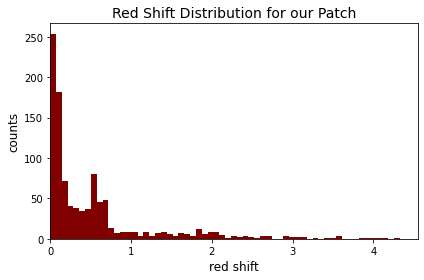

In [53]:
fig, ax = plt.subplots(1, 1)

# The histogram.  60 refers to the number of bins.
ax.hist(stars['redshift'], 60, color = 'maroon')

# Setting the x limit since there's nothing to the right of zero.
ax.set_xlim(0)

# Some labels for clarity.
ax.set_ylabel('counts', fontsize = 12)
ax.set_xlabel('red shift', fontsize = 12)
ax.set_title('Red Shift Distribution for our Patch', fontsize = 14)

fig.tight_layout()

#### Other Useful Resources

[1] https://astronomy.stackexchange.com/questions/18986/what-is-the-ugriz-magnitude-system

[2] https://www.sdss.org/dr16/imaging/imaging_basics/

---

#### Contributors

_Jeremy Kazimer_  
jdkazime@buffalo.edu